In [32]:
import pandas as pd
from FuzzyTM import FLSA_W
import matplotlib.pyplot as plt
import re
import numpy as np

In [17]:
# import the data
path = '../Assignment-1/Dataset/assignment-2-data.csv'
df_cleaned = pd.read_csv(path)

df_cleaned['new_tokenized'] = df_cleaned['clean_content'].apply(lambda x: x.split())

df_cleaned

,id,ticker,title,category,content,release_date,provider,url,article_id,Date,Open,Close,clean_content,label,tokenized_content,new_tokenized
0,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,ECB Effects\nThe move in the euro was huge fa...,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,2019-03-07,3.77750,3.73150,ecb effect move euro huge falling pip huge imp...,0,"['ecb', 'effect', 'move', 'euro', 'huge', 'fal...","[ecb, effect, move, euro, huge, falling, pip, ..."
1,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,2019-03-06,3.90400,3.80125,stock watch march trading session stock stock ...,0,"['stock', 'watch', 'march', 'trading', 'sessio...","[stock, watch, march, trading, session, stock,..."
2,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,Investing com A rout in Apple and Facebook ...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,2018-11-19,4.04475,3.61750,investing com rout apple facebook nasdaq fb mo...,0,"['investing', 'com', 'rout', 'apple', 'faceboo...","[investing, com, rout, apple, facebook, nasdaq..."
3,221597,UBER,The Best Of CES 2020 Revised,opinion,With 4 500 companies bringing their innovation...,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,2020-01-16,6.19300,6.22325,company bringing innovation ce jan get really ...,1,"['company', 'bringing', 'innovation', 'ce', 'j...","[company, bringing, innovation, ce, jan, get, ..."
4,221614,UBER,The Best Of CES 2020,opinion,With 4 500 companies bringing their innovation...,2020-01-10,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200498063,2020-01-10,6.18325,6.10800,company bringing innovation ce jan get really ...,0,"['company', 'bringing', 'innovation', 'ce', 'j...","[company, bringing, innovation, ce, jan, get, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,442657,AMD,Here s Why Nvidia NVDA Stock Is Gaining Today,opinion,Shares of Nvidia NASDAQ NVDA are up nearly...,2016-09-27,Zacks Investment Research,https://www.investing.com/analysis/here's-why-...,200155860,2016-09-27,1.60225,1.66350,share nvidia nasdaq nvda nearly tuesday solid ...,1,"['share', 'nvidia', 'nasdaq', 'nvda', 'nearly'...","[share, nvidia, nasdaq, nvda, nearly, tuesday,..."
3099,442682,AMD,4 Stocks To Watch Today ATW CWEI MXL SLCA,opinion,It was a pretty good start to the week on Mond...,2016-05-17,Harry Boxer,"https://www.investing.com/analysis/atw,-cwei,-...",200130262,2016-05-17,1.05000,1.05700,pretty good start week monday mean wood mean a...,1,"['pretty', 'good', 'start', 'week', 'monday', ...","[pretty, good, start, week, monday, mean, wood..."
3100,442705,AMD,Here s What The Buy Side Expects From AMD Thur...,opinion,Advanced Micro Devices Inc NYSE AMD is set ...,2014-04-17,Estimize,https://www.investing.com/analysis/here’s-what...,209915,2014-04-17,0.46050,0.46400,advanced micro device inc nyse amd set report ...,1,"['advanced', 'micro', 'device', 'inc', 'nyse',...","[advanced, micro, device, inc, nyse, amd, set,..."
3101,442984,T,Zacks com Featured Highlights AT T Nu Skin E...,opinion,For Immediate Release\n\nChicago IL July 22...,2016-07-21,Zacks Investment Research,https://www.investing.com/analysis/zacks.com-f...,200143537,2016-07-21,1.35250,1.33050,immediate release chicago il july stock week a...,0,"['immediate', 'release', 'chicago', 'il', 'jul...","[immediate, release, chicago, il, july, stock,..."


In [4]:
input_file = df_cleaned['new_tokenized'].to_list()

In [9]:
flsaW = FLSA_W(input_file=input_file, num_topics=10, num_words=10)

print(flsaW.get_vocabulary_size())

pwgt,ptgd = flsaW.get_matrices()

flsaW.show_topics()

for topic in flsaW.show_topics(representation='words'):
  print(topic)

print(flsaW.get_coherence_score())
print(flsaW.get_diversity_score())
print(flsaW.get_interpretability_score())

29908
['theory', 'podcast', 'human', 'century', 'mind', 'author', 'written', 'science', 'old', 'school']
['corporation', 'inc', 'gained', 'respectively', 'beat', 'robust', 'solution', 'holding', 'broader', 'investing']
['alv', 'pcg', 'bmwyy', 'icera', 'otcpk', 'nwsa', 'trv', 'nsany', 'chee', 'foo']
['stephen', 'depend', 'jensen', 'shifted', 'biology', 'served', 'pile', 'regardless', 'becoming', 'friendly']
['nvidia', 'nvda', 'hold', 'nyse', 'key', 'zacks', 'trade', 'rank', 'sector', 'past']
['ounce', 'unchanged', 'philadelphia', 'greenback', 'inbox', 'gainer', 'brent', 'amat', 'nov', 'caterpillar']
['premarket', 'troy', 'smh', 'randewich', 'noel', 'vlkay', 'cac', 'kem', 'kemet', 'unveils']
['book', 'evolution', 'richard', 'creativity', 'synthesis', 'inventing', 'certainty', 'feynman', 'professor', 'pretend']
['composite', 'rose', 'reuters', 'chipmaker', 'mu', 'sporting', 'outperformance', 'hottest', 'combination', 'regular']
['gmt', 'outnumbered', 'settle', 'slumped', 'vaneck', 'adbe',

In [19]:
num_topics_grid = [2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250, 300, 500]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

    if (coherence_score + diversity_score + interpretability_score > best_score):
        best_num_topics = num_topics
        best_score = coherence_score + diversity_score + interpretability_score

Training FLSA model with num_topics=2
Topics: [(0, '0.0009*"nasdaq" + 0.0009*"nvda" + 0.0008*"stock" + 0.0008*"company" + 0.0008*"share" + 0.0008*"nvidia" + 0.0008*"market" + 0.0007*"year" + 0.0007*"top" + 0.0007*"nyse"'), (1, '0.0003*"nasdaq" + 0.0003*"company" + 0.0003*"also" + 0.0003*"market" + 0.0003*"stock" + 0.0003*"nvda" + 0.0002*"new" + 0.0002*"share" + 0.0002*"time" + 0.0002*"year"')]
Training FLSA model with num_topics=3
Topics: [(0, '0.0002*"nasdaq" + 0.0002*"company" + 0.0002*"troy" + 0.0002*"also" + 0.0002*"premarket" + 0.0002*"market" + 0.0002*"stock" + 0.0002*"nvda" + 0.0002*"new" + 0.0002*"time"'), (1, '0.0014*"nasdaq" + 0.0013*"nvda" + 0.0013*"stock" + 0.0013*"quarter" + 0.0012*"share" + 0.0012*"investing" + 0.0012*"nvidia" + 0.0012*"company" + 0.0012*"intc" + 0.0012*"point"'), (2, '0.0004*"ounce" + 0.0004*"worst" + 0.0004*"unchanged" + 0.0004*"nasdaq" + 0.0004*"et" + 0.0004*"brent" + 0.0004*"performer" + 0.0004*"esp" + 0.0004*"company" + 0.0003*"advancing"')]
Training

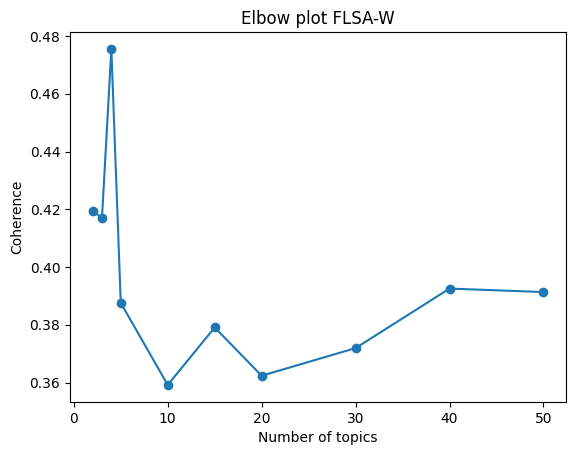

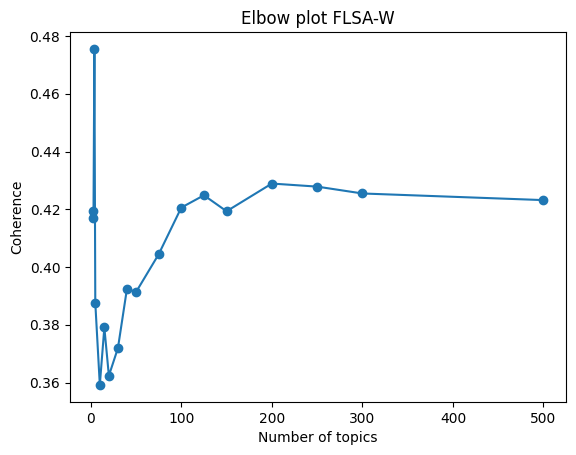

In [23]:
plt.plot(num_topics_grid[:10], coherence_scores[:10], marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

### Iteration 1

In [26]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4075147719007291
Test Diversity Score: 1.0
Test Interpretability Score: 0.4075147719007291
Topics: [(0, '0.0079*"computation" + 0.005*"valuing" + 0.0049*"coinbase" + 0.0047*"surplus" + 0.0047*"sweeping" + 0.0045*"myers" + 0.0044*"breathtaking" + 0.0042*"crunching" + 0.0041*"stumble" + 0.004*"fintech"'), (1, '0.0095*"traded" + 0.0087*"begun" + 0.0084*"chipmakers" + 0.0083*"rapid" + 0.0075*"shake" + 0.0075*"delivering" + 0.0074*"heading" + 0.0072*"unveiled" + 0.007*"ltd" + 0.0067*"nevertheless"'), (2, '0.0199*"russell" + 0.0146*"struck" + 0.0128*"occurred" + 0.0107*"fantastic" + 0.0107*"surely" + 0.0093*"engineering" + 0.0087*"false" + 0.0086*"toll" + 0.0083*"habit" + 0.0082*"pie"'), (3, '0.0186*"pegged" + 0.0124*"marked" + 0.0118*"expenditure" + 0.0112*"ip" + 0.0112*"18" + 0.0111*"consistently" + 0.0108*"embedded" + 0.0107*"superior" + 0.0097*"clara" + 0.008*"considerably"'), (4, '0.0561*"two" + 0.0554*"nasdaq" + 0.0471*"even" + 0.0461*"may" + 0.0444*"get" + 0.04

### Iteration 2

In [44]:
number_pattern = re.compile(r'.*\d')

input_file = [[s for s in sublist if not number_pattern.match(s)] for sublist in input_file]

In [49]:
best_num_topics = 100

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.39952810722556015
Test Diversity Score: 1.0
Test Interpretability Score: 0.39952810722556015
Topics: [(0, '0.0038*"lienert" + 0.0034*"sticking" + 0.0033*"tolerance" + 0.0031*"roaring" + 0.0031*"beneath" + 0.0031*"ul" + 0.003*"oncology" + 0.003*"usher" + 0.0029*"decoding" + 0.0029*"cryptos"'), (1, '0.0025*"considersome" + 0.0024*"horton" + 0.0022*"baird" + 0.0022*"xsd" + 0.0022*"flagged" + 0.0022*"ibes" + 0.002*"kimball" + 0.002*"surfaced" + 0.002*"cray" + 0.0019*"tan"'), (2, '0.0225*"intelligent" + 0.0164*"crack" + 0.0158*"spreading" + 0.0158*"depth" + 0.0154*"film" + 0.0152*"tackle" + 0.0147*"edition" + 0.0144*"taught" + 0.0142*"coronavirus" + 0.0136*"killed"'), (3, '0.0015*"suspends" + 0.0014*"xth" + 0.0013*"audvf" + 0.0012*"streetinsider" + 0.0012*"sgyp" + 0.0012*"anw" + 0.0012*"xon" + 0.0012*"fudzilla" + 0.0011*"sftbf" + 0.0011*"tecz"'), (4, '0.012*"reliance" + 0.0115*"ino" + 0.0079*"opiate" + 0.0071*"whichever" + 0.0059*"davos" + 0.0058*"nvax" + 0.0058*"nov

### Iteration 3

In [54]:
[word for list in input_file for word in list]

['ecb',
 'effect',
 'move',
 'euro',
 'huge',
 'falling',
 'pip',
 'huge',
 'important',
 'piece',
 'euro',
 'broke',
 'essential',
 'support',
 'wrote',
 'thought',
 'euro',
 'could',
 'even',
 'fall',
 'parity',
 'fed',
 'may',
 'need',
 'cut',
 'rate',
 'later',
 'year',
 'draghi',
 'dovish',
 'today',
 'outlook',
 'much',
 'german',
 'bunds',
 'fell',
 'around',
 'bps',
 'bps',
 'year',
 'fell',
 'break',
 'sends',
 'year',
 'back',
 'december',
 'low',
 'time',
 'investor',
 'come',
 'realize',
 'rate',
 'remain',
 'low',
 'fed',
 'need',
 'stay',
 'hold',
 'avoid',
 'dollar',
 'strengthen',
 'much',
 'dollar',
 'rise',
 'kill',
 'whatever',
 'inflationary',
 'force',
 'hurting',
 'multinational',
 'company',
 'result',
 'may',
 'fed',
 'need',
 'cut',
 'rate',
 'late',
 'keep',
 'dollar',
 'line',
 'versus',
 'euro',
 'avoid',
 'scenario',
 'good',
 'stock',
 'investor',
 'move',
 'risk',
 'curve',
 'low',
 'interest',
 'rate',
 'foster',
 'multiple',
 'expansion',
 'stock',
 'sp

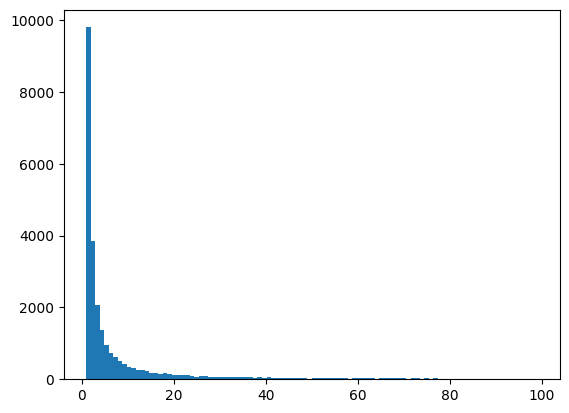

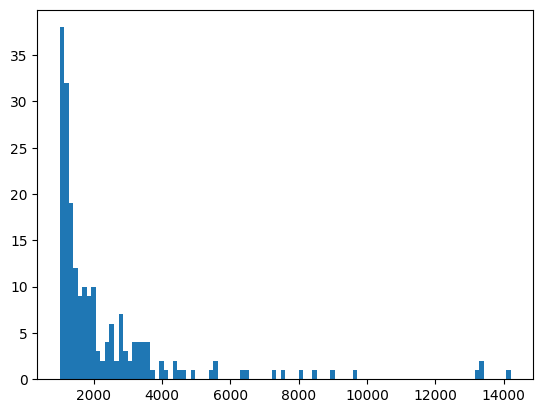

In [63]:
words = [word for list in input_file for word in list]
words, counts = np.unique(words, return_counts=True)

plt.hist(counts[counts<100], bins=100)
plt.show()

plt.hist(counts[counts>1000], bins=100)
plt.show()

words_to_filter = words[(counts < 5) | (counts > 2000)]

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

#### Significant reduction in number of words, so new hyperparameter tuning

In [65]:
num_topics_grid = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
coherence_scores = []
diversity_scores = []

# Iterate over the parameters
for num_topics in num_topics_grid:
    print(f"Training FLSA model with num_topics={num_topics}")

    flsaW = FLSA_W(input_file=input_file, num_topics=num_topics, num_words=10)

    pwgt, ptgd = flsaW.get_matrices()

    print(f"Topics: {flsaW.show_topics()}")

    coherence_score = flsaW.get_coherence_score()
    diversity_score = flsaW.get_diversity_score()
    interpretability_score = flsaW.get_interpretability_score()

    coherence_scores.append(coherence_score)
    diversity_scores.append(diversity_score)

    if (coherence_score + diversity_score + interpretability_score > best_score):
        best_num_topics = num_topics
        best_score = coherence_score + diversity_score + interpretability_score

Training FLSA model with num_topics=5
Topics: [(0, '0.0019*"corporation" + 0.0017*"com" + 0.0016*"gained" + 0.0016*"investing" + 0.0016*"corp" + 0.0016*"intc" + 0.0015*"released" + 0.0014*"rising" + 0.0014*"beat" + 0.0014*"note"'), (1, '0.019*"expect" + 0.0183*"generation" + 0.0156*"executive" + 0.0156*"gross" + 0.015*"half" + 0.0146*"margin" + 0.0146*"know" + 0.0144*"think" + 0.0143*"chief" + 0.0133*"president"'), (2, '0.0006*"traded" + 0.0006*"previously" + 0.0006*"ltd" + 0.0006*"amat" + 0.0006*"inbox" + 0.0006*"ratio" + 0.0005*"nov" + 0.0005*"cryptocurrency" + 0.0005*"applied" + 0.0005*"proven"'), (3, '0.0041*"graphic" + 0.0041*"cash" + 0.004*"gpus" + 0.004*"fourth" + 0.0039*"basis" + 0.0039*"non" + 0.0039*"ago" + 0.0039*"compared" + 0.0039*"expanding" + 0.0038*"segment"'), (4, '0.0005*"premarket" + 0.0004*"gmt" + 0.0004*"thomson" + 0.0004*"troy" + 0.0003*"smh" + 0.0003*"implied" + 0.0003*"avoided" + 0.0003*"strategiesit" + 0.0003*"conclusively" + 0.0003*"soxx"')]
Training FLSA mode

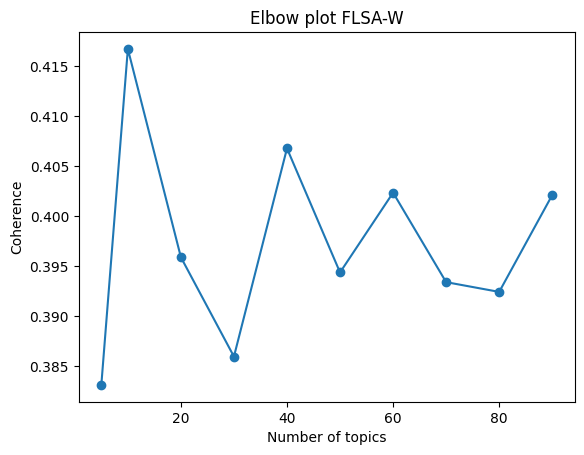

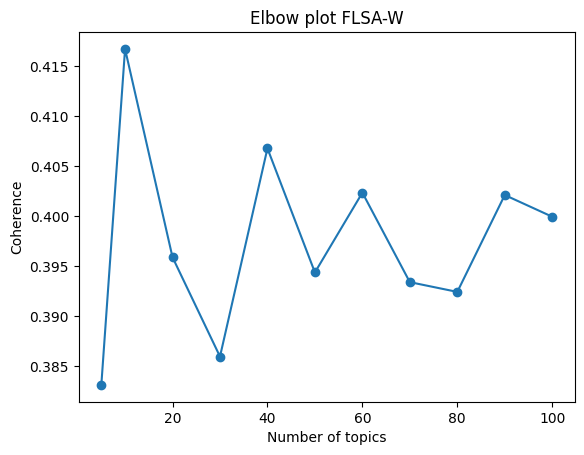

In [66]:
plt.plot(num_topics_grid, coherence_scores, marker='o', linestyle='-')
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Elbow plot FLSA-W')
plt.show()

In [67]:
best_num_topics = 40

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.3945747349875963
Test Diversity Score: 0.9975
Test Interpretability Score: 0.39358829815012736
Topics: [(0, '0.0368*"seven" + 0.035*"workload" + 0.0315*"merrill" + 0.0288*"lynch" + 0.0259*"jefferies" + 0.0236*"approximately" + 0.0224*"operator" + 0.0202*"turning" + 0.0193*"moore" + 0.0187*"journey"'), (1, '0.0061*"applied" + 0.0056*"ltd" + 0.0053*"micron" + 0.0053*"referendum" + 0.0051*"texas" + 0.005*"killing" + 0.0048*"legislation" + 0.0046*"qualcomm" + 0.0044*"grade" + 0.0042*"generating"'), (2, '0.005*"chipmakers" + 0.0048*"newsletter" + 0.0046*"seeking" + 0.0045*"jim" + 0.0043*"motor" + 0.0042*"sending" + 0.0041*"tomorrow" + 0.004*"extreme" + 0.0039*"correction" + 0.0039*"caused"'), (3, '0.0019*"tm" + 0.0018*"delta" + 0.0017*"pypl" + 0.0017*"williams" + 0.0017*"exclude" + 0.0017*"sustainability" + 0.0016*"spectacular" + 0.0016*"dal" + 0.0016*"setup" + 0.0016*"tencor"'), (4, '0.0143*"expectation" + 0.0142*"largest" + 0.0137*"date" + 0.0132*"msft" + 0.0115*"i

### Iteration 4

In [68]:
words_to_filter = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

input_file = [[s for s in sublist if not s in words_to_filter] for sublist in input_file]

In [70]:
best_num_topics = 40

# Train the best model on the combined train and validation data
test_flsa_model = FLSA_W(input_file=input_file, num_topics=best_num_topics, num_words=20)

pwgt, ptgd = test_flsa_model.get_matrices()

test_coherence_score = test_flsa_model.get_coherence_score()
test_diversity_score = test_flsa_model.get_diversity_score()
test_interpretability_score = test_flsa_model.get_interpretability_score()

print(f"Test Coherence Score: {test_coherence_score}")
print(f"Test Diversity Score: {test_diversity_score}")
print(f"Test Interpretability Score: {test_interpretability_score}")

print(f"Topics: {test_flsa_model.show_topics()}")

Test Coherence Score: 0.4289080753295533
Test Diversity Score: 0.995
Test Interpretability Score: 0.42676353495290553
Topics: [(0, '0.0151*"rose" + 0.0098*"commodity" + 0.0092*"composite" + 0.009*"rebound" + 0.0088*"washington" + 0.0081*"utility" + 0.0079*"tension" + 0.0077*"north" + 0.0077*"reserve" + 0.0077*"sharp" + 0.0071*"gold" + 0.0067*"japanese" + 0.0062*"wmt" + 0.0062*"unlikely" + 0.0061*"nation" + 0.0058*"lowest" + 0.0058*"political" + 0.0057*"vix" + 0.0056*"yesterday" + 0.0056*"commerce"'), (1, '0.0091*"hottest" + 0.008*"phenomenon" + 0.0078*"rival" + 0.0074*"familiar" + 0.0072*"chipmaker" + 0.0071*"beating" + 0.0069*"blast" + 0.0065*"consistent" + 0.0063*"designed" + 0.006*"electronics" + 0.0059*"improving" + 0.0058*"outperformance" + 0.0056*"happen" + 0.0055*"region" + 0.0054*"german" + 0.0053*"interested" + 0.0053*"smart" + 0.005*"electronic" + 0.0048*"plenty" + 0.0048*"sharply"'), (2, '0.043*"desktop" + 0.0427*"server" + 0.0372*"margin" + 0.0367*"thanks" + 0.0343*"preside